### Colab 환경에서의 자연어 처리 시작하기

#### 1-1 한글 폰트 설정
#### 1-2 한글 적용 확인
#### 1-3 konlpy 설치
#### 1-4 한글 엔진을 이용한 간단한 예제

In [0]:
# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
import matplotlib as mpl             # 기본 설정 만지는 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

### colab 환경에서 한글 적용을 위한 나눔 고딕 설치

In [2]:
### 나눔 고딕 설치  
!apt-get update -qq   # 설치를 업데이트   -qq  : 로그를 최소한으로
!apt-get install fonts-nanum* -qq # 설치한다. fonts-nanum*   =>  ttf-nanum, ttf-nanum-coding, ttf-nanum-extra ]

Selecting previously unselected package fonts-nanum.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔 글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

### 런타임 재기동 후, 
 * (방법 1) CTRL + M . 을 실행 
 * (방법 2) 메뉴의 런타임 선택 후, 런타임 다시 시작 선택
 * 데이터 준비
 * 라이브러리 import 
 * 폰트 설정 후, 확인

In [0]:
# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

In [2]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False


NanumGothic Eco


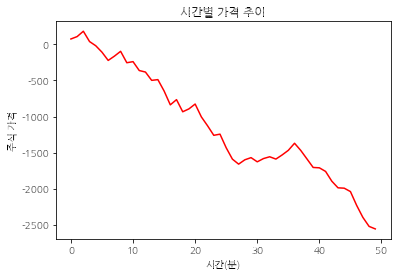

In [3]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()
data

# 그래프를 그려보자. 이번에는 정상
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 1-3 konlpy 설치
  * pip install konlpy

In [4]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 2.9MB 45.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
import nltk   # 자연어 처리

### 꼬꼬마를 이용한 분석 
  * 문장 분석
  * 명사 분석
  * 형태소 분석

In [15]:
%%time

from konlpy.tag import Kkma
k = Kkma()

# 문장분석
k.sentences('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

CPU times: user 92.8 ms, sys: 6.94 ms, total: 99.8 ms
Wall time: 66.7 ms


In [7]:
# 명사분석
k.nouns('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

['안녕', '오늘', '한글', '분석']

In [8]:
# 형태소분석
k.pos('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EFN'),
 ('!', 'SF'),
 ('오늘', 'NNG'),
 ('은', 'JX'),
 ('한글', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('하', 'VV'),
 ('어', 'ECS'),
 ('보', 'VXV'),
 ('ㄹ게요', 'EFN'),
 ('.', 'SF')]

* http://kkma.snu.ac.kr/documents/index.jsp?doc=postag : 한글 형태소 분석기 품사 태그표
* (예) NNG : 일반 명사, XSV : 동사 파생 접미사, EFN : 평서형 종결 어미

### 또 다른 한글 엔진 사용해 보기
 * 한나눔 한글 엔진 사용해 보기
 * Okt 엔진 사용해 보기

In [0]:
from konlpy.tag import Hannanum

In [10]:
han = Hannanum()
han.nouns('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

['안녕', '오늘', '한글', '분석', '볼게요']

In [11]:
han.analyze('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

[[[('안녕', 'ncps'), ('하세', 'ncpa'), ('요', 'ncn')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세요', 'ef')],
  [('안녕', 'ncps'), ('하', 'xsms'), ('세', 'ef'), ('요', 'jxf')]],
 [[('!', 'sf')]],
 [],
 [[('오늘', 'ncn'), ('은', 'jxc')], [('오늘', 'ncn'), ('은', 'ncn')]],
 [[('한글', 'ncn')], [('한글', 'nqq')]],
 [[('분석', 'ncpa'), ('을', 'jco')]],
 [[('하', 'pvg'), ('어', 'ecx')],
  [('하', 'pvg'), ('어', 'ecc')],
  [('하', 'pvg'), ('어', 'ecs')],
  [('하', 'pvg'), ('어', 'ef')],
  [('하', 'px'), ('어', 'ecx')],
  [('하', 'px'), ('어', 'ecc')],
  [('하', 'px'), ('어', 'ecs')],
  [('하', 'px'), ('어', 'ef')],
  [('해', 'nbu')],
  [('해', 'ncn')]],
 [[('볼게요', 'ncn')], [('볼게요', 'nqq')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [12]:
han.morphs('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

['안녕', '하', '세', '요', '!', '오늘', '은', '한글', '분석', '을', '하', '어', '볼게요', '.']

In [13]:
han.pos('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

[('안녕', 'N'),
 ('하', 'X'),
 ('세', 'E'),
 ('요', 'J'),
 ('!', 'S'),
 ('오늘', 'N'),
 ('은', 'J'),
 ('한글', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('하', 'P'),
 ('어', 'E'),
 ('볼게요', 'N'),
 ('.', 'S')]

### 한글 엔진별 가동시간

In [17]:
%%time

from konlpy.tag import Kkma
k = Kkma()
k.sentences('안녕하세요! 오늘은 한글 분석을 해 볼게요.')
k.nouns('안녕하세요! 오늘은 한글 분석을 해 볼게요.')
k.pos('안녕하세요! 오늘은 한글 분석을 해 볼게요.')

CPU times: user 227 ms, sys: 28.9 ms, total: 256 ms
Wall time: 143 ms


In [27]:
%%time

from konlpy.tag import Komoran
komo = Komoran()
print(komo.nouns('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))    # 명사분석
print(komo.pos('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))      # 품사태깅
print(komo.morphs('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))   # 형태소분석

['안녕하세요', '오늘', '한글', '분석']
[('안녕하세요', 'NNP'), ('!', 'SF'), ('오늘', 'NNG'), ('은', 'JX'), ('한글', 'NNP'), ('분석', 'NNG'), ('을', 'JKO'), ('하', 'VV'), ('아', 'EC'), ('보', 'VX'), ('ㄹ게요', 'EF'), ('.', 'SF')]
['안녕하세요', '!', '오늘', '은', '한글', '분석', '을', '하', '아', '보', 'ㄹ게요', '.']
CPU times: user 19.9 s, sys: 39.3 ms, total: 20 s
Wall time: 10.2 s


In [28]:
%%time

# Open korean text
# http://github.com/open-korean-text/open-korean-text
from konlpy.tag import Okt
okt = Okt()
print(okt.nouns('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))
print(okt.pos('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))
print(okt.morphs('안녕하세요! 오늘은 한글 분석을 해 볼게요.'))

['오늘', '한글', '분석', '해']
[('안녕하세요', 'Adjective'), ('!', 'Punctuation'), ('오늘', 'Noun'), ('은', 'Josa'), ('한글', 'Noun'), ('분석', 'Noun'), ('을', 'Josa'), ('해', 'Noun'), ('볼게요', 'Verb'), ('.', 'Punctuation')]
['안녕하세요', '!', '오늘', '은', '한글', '분석', '을', '해', '볼게요', '.']
CPU times: user 94.3 ms, sys: 2.99 ms, total: 97.3 ms
Wall time: 59 ms
